<a href="https://colab.research.google.com/github/DevJaepaL/OpenCV/blob/main/%EB%B3%B4%EC%A1%B4_%EC%8A%A4%EB%AC%B4%EB%94%A9(Conservative_Smoothing).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


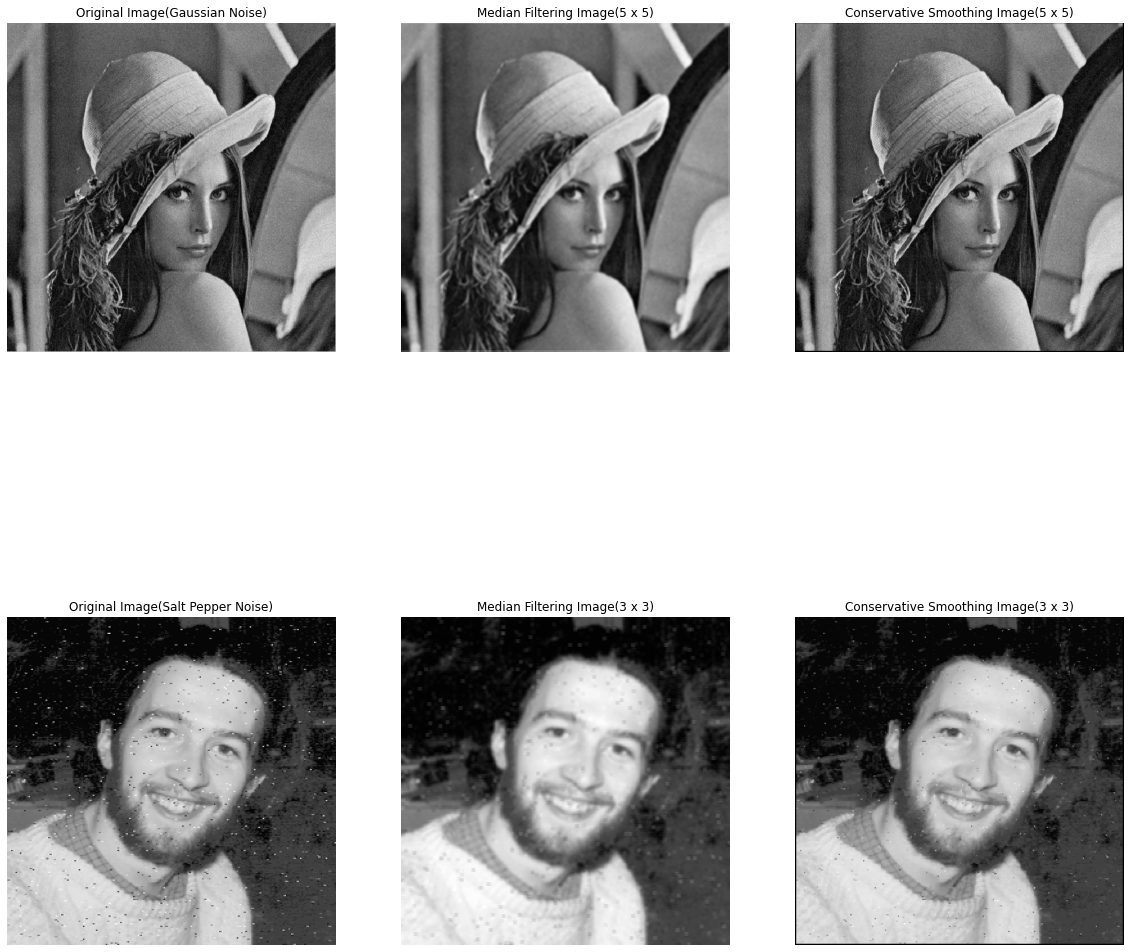

In [4]:
# 입력 영상의 픽셀 밝기값이 주변 픽셀과 비교했을 때 너무 높거나 너무 낮은 경우 잡음으로 가정하고
# 이 픽셀을 가장 가까운 픽셀 값으로 대체하는 기법
#   장점 : 단순하면서도 영상의 경계선과 같은 세밀한 부분을 유지하면서 Salt & Pepper Noise와 같이 점 단위로 튀는 임펄스 잡음을 잡는데 효과적.
#   단점 : 가우시안 잡음과 같은 부가적인 잡음(additive noise)의 제거에는 성능이 떨어진다.
# 보존 스무딩은 중간 값 필터링에 비해 가우시안 잡음제거 성능이 떨어지지만 고주파 성분이 잘 보존된다. 

from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/gdrive') 
#영상 불러오기
img1 = cv2.imread('/content/gdrive/My Drive/Image_Processing/Lena-Gaussian-noise1.jpg')
img2 = cv2.imread('/content/gdrive/My Drive/Image_Processing/fce(salt_pepper noise).bmp')

# color영상을 gray영상으로 만들기
# img1 부분
gray_imgM = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
output_img1 = np.zeros((img1.shape[0],img1.shape[1]))

# img2 부분
gray_imgMM = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
output_img4 = np.zeros((img2.shape[0],img2.shape[1]))

center=0
current=0
min=255;
max=0;
ed=2 # 3x3커널일 경우 1, 5x5 커널일 경우 2
ed_3=1

# 중간 필터링 적용
output_img2 = cv2.blur(gray_imgM,(5,5))
output_img3 = cv2.blur(gray_imgMM,(3,3))

# 초기값 및 최대 최소값 적용하기.
for h in range(ed,img1.shape[0]-ed,1):
  for w in range(ed, img1.shape[1]-ed,1):
      #초기값 설정
      center = gray_img1[h,w]
      min = gray_img1[h-ed,w-ed]
      max = gray_img1[h-ed,w-ed]
      #최대, 최소 구하기
      for m in range(-ed,ed,1):
         for n in range(-ed,ed,1):
            if( m==0 and n==0):
              continue
            else:
              current = gray_img1[h+m,w+n]
            if (min > current):
              min = current
            if (max < current):
              max = current   
      if (center> min and center < max):
        output_img1[h,w] = center
      elif (center > max):
        center = max
      elif (center < min):
        center = min
      output_img1[h,w] = center

for h in range(ed_3,img2.shape[0]-ed_3,1):
  for w in range(ed_3, img2.shape[1]-ed_3,1):
      #초기값 설정
      center = gray_img2[h,w]
      min = gray_img2[h-ed_3,w-ed_3]
      max = gray_img2[h-ed_3,w-ed_3]
      #최대, 최소 구하기
      for m in range(-ed_3,ed_3,1):
         for n in range(-ed_3,ed_3,1):
            if( m==0 and n==0):
              continue
            else:
              current = gray_img2[h+m,w+n]
            if (min > current):
              min = current
            if (max < current):
              max = current   
      if (center> min and center < max):
        output_img4[h,w] = center
      elif (center > max):
        center = max
      elif (center < min):
        center = min
      output_img4[h,w] = center

#그림을 화면에 출력
plt.figure(figsize=(20,20))# 영상의 크기를 키워주자
plt.subplot(2,3,1)
plt.title("Original Image(Gaussian Noise)")
plt.imshow(gray_img1, cmap='gray')
plt.axis("off")
plt.subplot(2,3,2)
plt.title("Median Filtering Image(5 x 5)")
plt.imshow(output_img2, cmap='gray')
plt.axis("off")
plt.subplot(2,3,3)
plt.title("Conservative Smoothing Image(5 x 5)")
plt.imshow(output_img1, cmap='gray')
plt.axis("off")
plt.subplot(2,3,4)
plt.title("Original Image(Salt Pepper Noise)")
plt.imshow(gray_imgMM, cmap='gray')
plt.axis("off")
plt.subplot(2,3,5)
plt.title("Median Filtering Image(3 x 3)")
plt.imshow(output_img3, cmap='gray')
plt.axis("off")
plt.subplot(2,3,6)
plt.title("Conservative Smoothing Image(3 x 3)")
plt.imshow(output_img4, cmap='gray')
plt.axis("off")
plt.show()

In [ ]:
)